# Projeto da Academia Accenture

# A equipe  
![](https://raw.githubusercontent.com/vgs2/f1-analysis/main/images/equipe.png)

# A modelagem do Banco de Dados


### O MER
Para montarmos o MER utilizamos o draw.io (https://app.diagrams.net/).
Para melhor visualização, fizemos uma versão simplificada, com menos atributos.

![](https://raw.githubusercontent.com/vgs2/f1-analysis/main/images/MER.png)

### O DER
Para montarmos o DER, utilizamos o sqldbm (https://sqldbm.com/)

![](https://raw.githubusercontent.com/vgs2/f1-analysis/main/images/DER.png)

### O DER do DW
![](https://raw.githubusercontent.com/vgs2/f1-analysis/main/images/DER-DW.png)

# A implementação do Banco de Dados
## O banco escolhido
Para implementarmos o Banco de Dados, o PostgreSQL foi escolhido, simplemente pelo fato de nós termos uma maior familiaridade com ele.

![](https://www.bacula.lat/wp-content/uploads/2019/05/postgresql-logo.png)

## A fonte dos dados  
![](https://www.kaggle.com/static/images/site-logo.png)  
https://www.kaggle.com/rohanrao/formula-1-world-championship-1950-2020

## Ferramenta utilizada para auxiliar nas queries e visualização do banco
![](https://raw.githubusercontent.com/vgs2/f1-analysis/main/images/beekeeper.png)

### Pontos chave da implementação do banco:
Visão geral:   
![](https://raw.githubusercontent.com/vgs2/f1-analysis/main/images/general-view1.png)  
  <br>

  

Docker  
![](https://raw.githubusercontent.com/vgs2/f1-analysis/main/images/docker.png)  
  
Criaçã|o de tabelas no modelo relacional:  
![](https://raw.githubusercontent.com/vgs2/f1-analysis/main/images/create.png)  

Povoamento das tabelas no modelo relacional:  
![](https://raw.githubusercontent.com/vgs2/f1-analysis/main/images/copy.png)

Criação de tabelas para o DW  
![](https://raw.githubusercontent.com/vgs2/f1-analysis/main/images/create-dw.png)  
Povoamento do DW  
![](https://raw.githubusercontent.com/vgs2/f1-analysis/main/images/final-dw-pop.png)

Disponibilização das informações como CSV para acesso pelo Pandas  
![](https://raw.githubusercontent.com/vgs2/f1-analysis/main/images/populate_dw.png)

# A análise de dados

Para a análise de dados, foi utilizada a linguagem Python, junto a várias bibliotecas que serão mencionadas abaixo.

### Instalação do módulo chart_studio do Plotly




In [2]:
!pip install chart_studio

     |████████████████████████████████| 71kB 5.3MB/s 


### Importação dos módulos utilizados

In [3]:
import ipywidgets as widgets
from IPython.display import clear_output
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import plotly.tools as tl
import plotly.graph_objs as go

### Carregamento da tabela fato e dimensões para o Pandas

In [4]:
fact_table = pd.read_csv('https://raw.githubusercontent.com/vgs2/f1-analysis/main/database/csv/FATO_corrida.csv')
dim_circuito = pd.read_csv('https://raw.githubusercontent.com/vgs2/f1-analysis/main/database/csv/DIM_circuito.csv')
dim_construtor = pd.read_csv('https://raw.githubusercontent.com/vgs2/f1-analysis/main/database/csv/DIM_construtor.csv')
dim_piloto = pd.read_csv('https://raw.githubusercontent.com/vgs2/f1-analysis/main/database/csv/DIM_piloto.csv')
dim_tempo = pd.read_csv('https://raw.githubusercontent.com/vgs2/f1-analysis/main/database/csv/DIM_tempo.csv')


# Informações solicitadas no projeto

## Classificação do campeonado de pilotos

In [5]:
def dropdown_year_eventhandler(change):
    
    
    ano = change.owner.value

    data = classification_data[classification_data.ano == ano].nlargest(20,'pontos')
    g = sns.barplot(x='pontos',y='nome_piloto',data=data,palette='Blues_r')
    sns.set(rc={'figure.figsize':(15,11)})
    g.set(xlabel='Quantidade de Pontos',ylabel='Piloto')
    g.set_title(f'Classificação no ano de {change.owner.value}')
    clear_output()
    display(dropdown_ano)

driver_data = fact_table.merge(dim_piloto,on='id_piloto')
driver_data_time = driver_data.merge(dim_tempo,on='id_tempo')
classification_data = driver_data_time.groupby(['ano','nome_piloto']).agg({'pontos':'sum'}).reset_index().sort_values(['ano','pontos'],ascending=[False,False])  
dropdown_ano = widgets.Dropdown(options = sorted(driver_data_time.ano.unique()))
display(dropdown_ano)
dropdown_ano.observe(dropdown_year_eventhandler)

Dropdown(options=(1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 19…

## Classificação do campeonato de Construtores

In [6]:
def dropdown_year_eventhandler(change):
    
    
    ano = change.owner.value

    data = classification_data[classification_data.ano == ano].nlargest(20,'pontos')
    print(change)
    print(ano)
    print(data.head())
    g = sns.barplot(x='pontos',y='nome_construtor',data=data,palette='Blues_r')
    sns.set(rc={'figure.figsize':(15,11)})
    g.set(xlabel='Quantidade de Pontos',ylabel='Construtor')
    g.set_title(f'Classificação no ano de {change.owner.value}')
    clear_output()
    display(dropdown_ano)


constructor_data = fact_table.merge(dim_construtor,on='id_construtor')
constructor_data_time = constructor_data.merge(dim_tempo,on='id_tempo')
classification_data = constructor_data_time.groupby(['ano','nome_construtor']).agg({'pontos':'sum'}).reset_index().sort_values(['ano','pontos'],ascending=[False,False])    
dropdown_ano = widgets.Dropdown(options = sorted(constructor_data_time.ano.unique()))
display(dropdown_ano)
dropdown_ano.observe(dropdown_year_eventhandler)

Dropdown(options=(1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 19…

## Pilotos com mais pódios

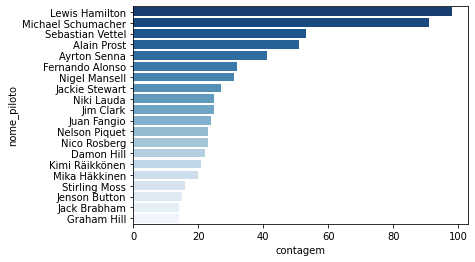

In [7]:
driver_data = fact_table.merge(dim_piloto,on='id_piloto')
driver_data_time = driver_data.merge(dim_tempo,on='id_tempo')
grouped_poles = driver_data_time.groupby(['ano','nome_piloto'])['posicao_corrida'].value_counts()
df = pd.DataFrame(grouped_poles)
df.rename(columns={'posicao_corrida':'contagem'},inplace=True)
df.reset_index(inplace=True)
df = df[df.posicao_corrida == 1]
podios = pd.DataFrame(df.groupby('nome_piloto')['contagem'].sum().sort_values(ascending=False)).reset_index().nlargest(20,'contagem')
sns.barplot(x='contagem',y='nome_piloto',data=podios,palette='Blues_r')
sns.set(rc={'figure.figsize':(17,13)})
plt.show()

## Pilotos com mais poles


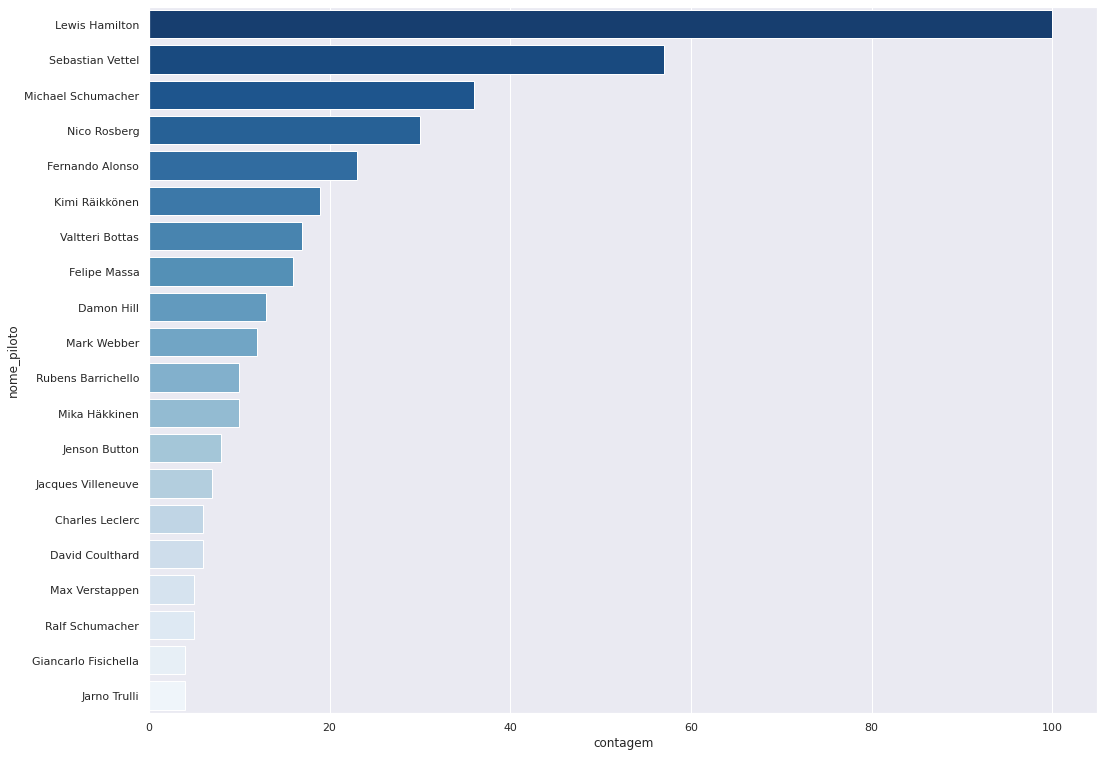

In [8]:
driver_data = fact_table.merge(dim_piloto,on='id_piloto')
driver_data_time = driver_data.merge(dim_tempo,on='id_tempo')
grouped_poles = driver_data_time.groupby(['ano','nome_piloto'])['posicao_qualify'].value_counts()
df = pd.DataFrame(grouped_poles)
df.rename(columns={'posicao_qualify':'contagem'},inplace=True)
df.reset_index(inplace=True)
df = df[df.posicao_qualify == 1]
poles = pd.DataFrame(df.groupby('nome_piloto')['contagem'].sum().sort_values(ascending=False)).reset_index().nlargest(20,'contagem')
sns.barplot(x='contagem',y='nome_piloto',data=poles,palette='Blues_r')
sns.set(rc={'figure.figsize':(17,13)})
plt.show()

# Agora, estão aqui algumas informações extras que a gente trouxe para vocês.


## Visualização da posição dos autódromos no mundo

In [9]:
geo_data = dim_circuito[['latitude','longitude','nome_circuito']]
geo_data = geo_data.drop_duplicates()
mapbox_access_token = 'pk.eyJ1Ijoid2VzbGxleWNzdHMiLCJhIjoiY2twendkMWxkMHcwMTJucHBmb2kwc3hjaSJ9.191yTxoHIqEF2Yje7I1pYA'
data = go.Scattermapbox(
        lat=geo_data.latitude,
        lon=geo_data.longitude,
        mode='markers',
        marker=dict(
            size=10,
            color='rgb(255, 0, 0)',
            opacity=1
        ),
        text=geo_data.nome_circuito,
        hoverinfo='text'
    )


# Generate a layout around Los Angeles, zoomed in so we can see the data points 

layout = go.Layout(
    title='Localização dos Autódromos',
    autosize=True,
    hovermode='closest',
    showlegend=False,
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=0,
            lon=0
        ),
        pitch=0,
        zoom=2,
        style='light'
    ),
)
	
# Generate the figure using the iplot function 
  
fig = go.Figure(data=data, layout=layout)
fig.show()

## Nacionalidades com mais premiações

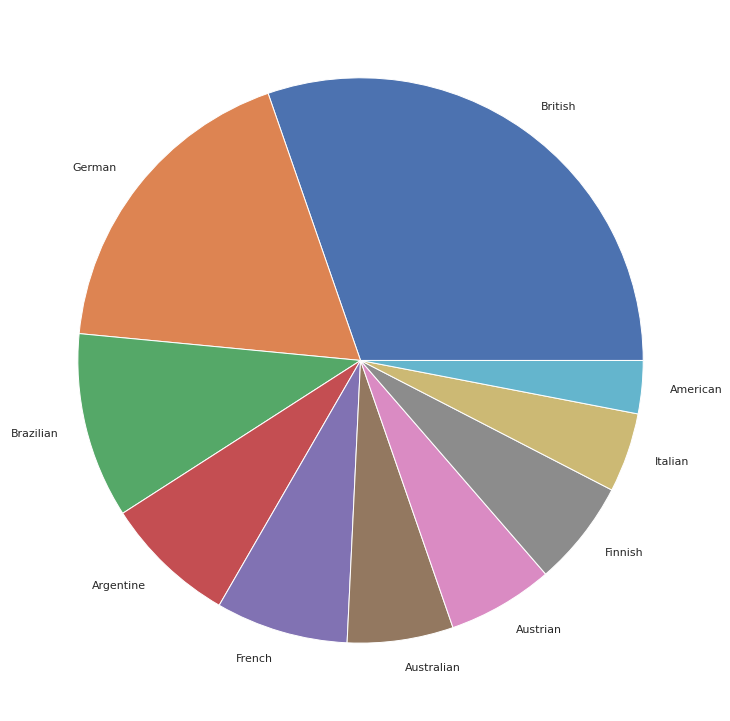

In [10]:
grouped_points = driver_data_time.groupby(['ano','nacionalidade_piloto','nome_piloto']).agg({'pontos':np.sum}).reset_index().sort_values(by=['ano','pontos'],ascending=[True,False])
winner_year = grouped_points.loc[grouped_points.groupby('ano')['pontos'].idxmax()]
winner_year = winner_year[winner_year.ano != 2021]
winner_times = winner_year.groupby('nacionalidade_piloto').agg({'ano':'count'}).rename(columns={'ano':'Quantidade_campeonatos'}).sort_values(by='Quantidade_campeonatos',ascending=False).reset_index().nlargest(10,'Quantidade_campeonatos')
fig,ax = plt.pie(winner_times.Quantidade_campeonatos,labels=winner_times.nacionalidade_piloto)

plt.show()

# Quantidade de pilotos brasileiros ao passar dos anos

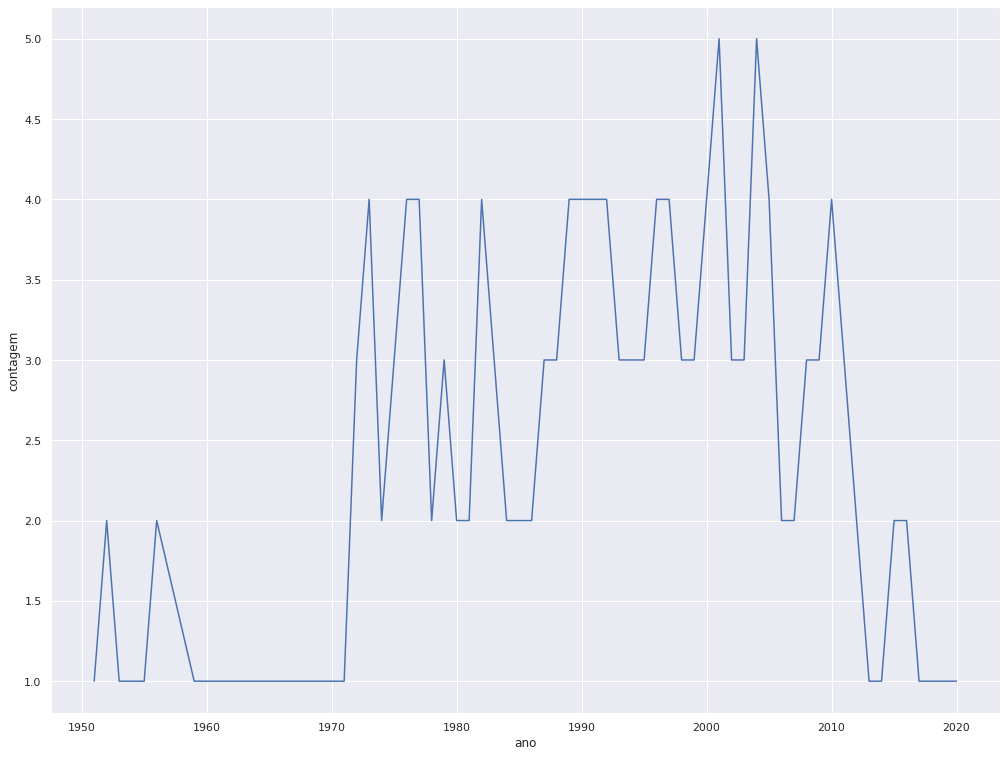

In [11]:
pilotos_br = driver_data_time[driver_data_time.nacionalidade_piloto == 'Brazilian']
brs_anos = pilotos_br.groupby(['ano','nome_piloto']).agg({'nome_piloto':'count'}).rename(columns={'nome_piloto':'contagem'}).reset_index().groupby('ano').agg({'nome_piloto':'count'}).rename(columns={'nome_piloto':'contagem'}).reset_index()
sns.lineplot(x='ano',y='contagem',data=brs_anos)


## Maior velocidade de pilotos

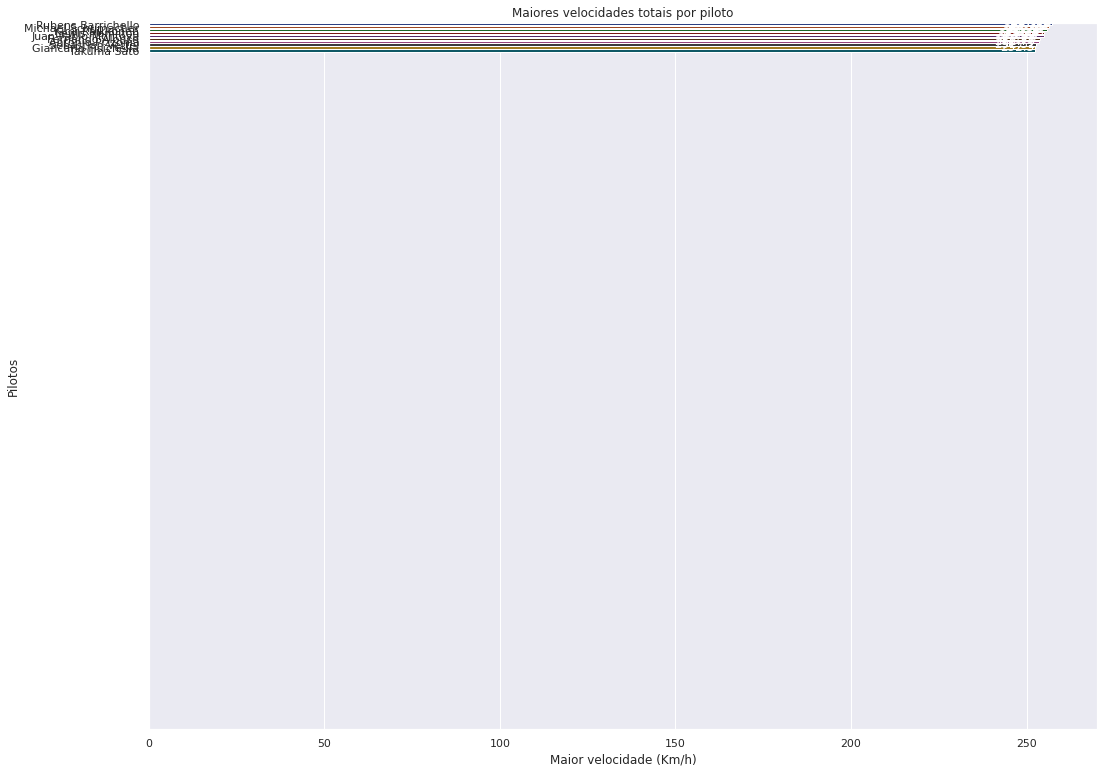

In [12]:
driver_data = fact_table.merge(dim_piloto,on='id_piloto')
driver_data_time = driver_data.merge(dim_tempo,on='id_tempo')
grouped_driver = driver_data.groupby('nome_piloto').agg({'maior_velocidade':np.max}).sort_values(by='maior_velocidade',ascending=False)
grouped_driver = grouped_driver[grouped_driver.maior_velocidade != -1].reset_index().nlargest(10,'maior_velocidade')
g = sns.barplot(y='nome_piloto',x='maior_velocidade',data=grouped_driver,palette='dark')
g.set(xlabel='Maior velocidade (Km/h)',ylabel='Pilotos')
g.set_title('Maiores velocidades totais por piloto')
for index, row in grouped_driver.iterrows():
    g.text(row.maior_velocidade,row.name,round(row.maior_velocidade,2), color='white', ha="right")
sns.set(rc={'figure.figsize':(17,13)})
g.set(ylim=(240, None))
plt.show()

## Construtores com maiores poles positions

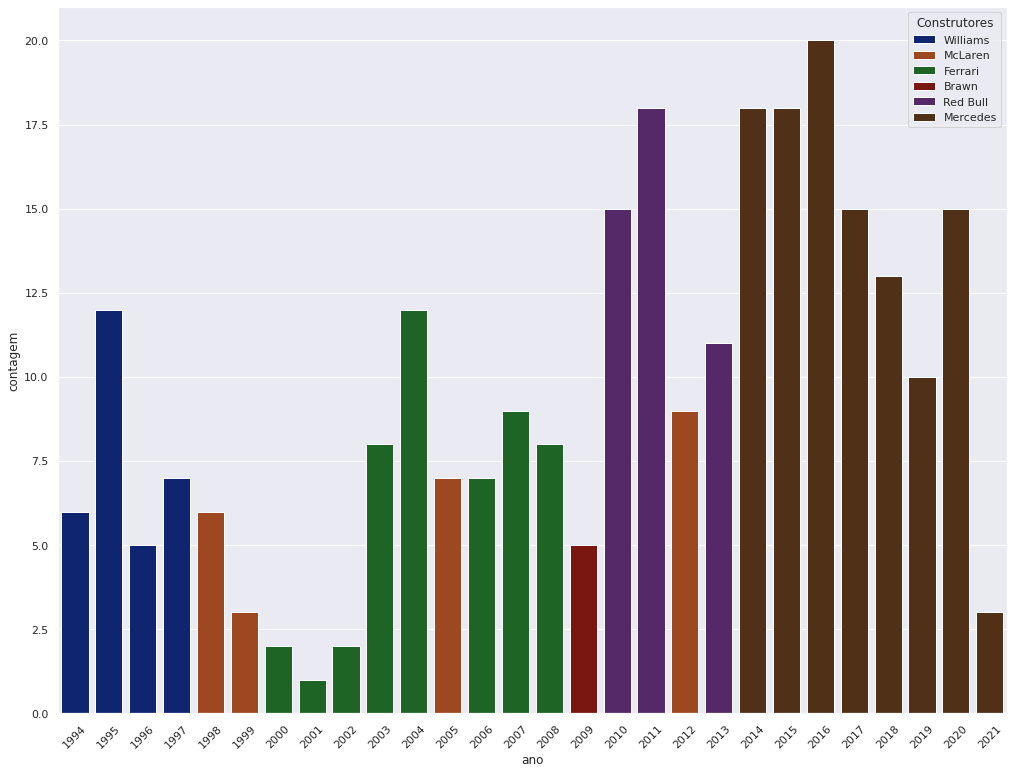

In [13]:
grouped_poles = constructor_data_time.groupby(['ano','nome_construtor'])['posicao_qualify'].value_counts()
df = pd.DataFrame(grouped_poles)
df.rename(columns={'posicao_qualify':'contagem'},inplace=True)
df.reset_index(inplace=True)
df = df[df.posicao_qualify == 1]
first_places = df.loc[df.groupby('ano')['contagem'].idxmax()]

g = sns.barplot(x='ano',y='contagem',data=first_places,hue='nome_construtor',dodge=False,palette='dark')
plt.legend(title='Construtores')
sns.set(rc={'figure.figsize':(15,11)})
plt.xticks(rotation=45)
plt.show()

## Top 10 construtores com maior velocidade em todos os tempos

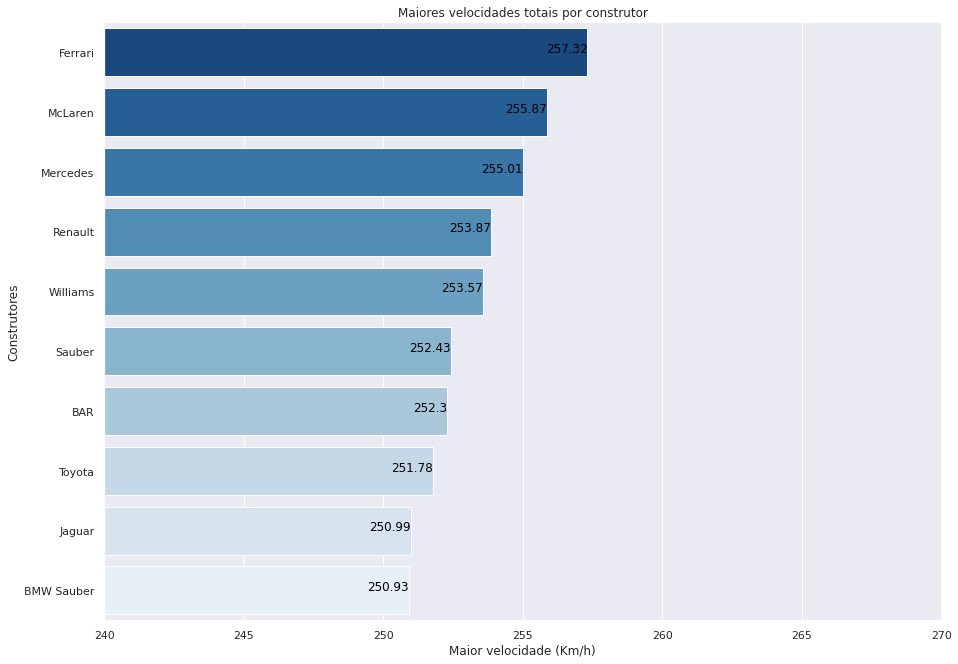

In [14]:
constructor_data = fact_table.merge(dim_construtor,on='id_construtor')
grouped_constructor = constructor_data.groupby('nome_construtor').agg({'maior_velocidade':np.max}).sort_values(by='maior_velocidade',ascending=False)
grouped_constructor = grouped_constructor[grouped_constructor.maior_velocidade != -1].reset_index().iloc[:10]
g = sns.barplot(y='nome_construtor',x='maior_velocidade',data=grouped_constructor,palette='Blues_r')
g.set(xlabel='Maior velocidade (Km/h)',ylabel='Construtores')
g.set_title('Maiores velocidades totais por construtor')
g.set_xlim(240,270)
for index, row in grouped_constructor.iterrows():
    g.text(row.maior_velocidade,row.name,round(row.maior_velocidade,2), color='black', ha="right")
sns.set(rc={'figure.figsize':(17,13)})
plt.show()

## Evolução da velocidade máxima por construtor

In [15]:
def unique_sorted_values_plus_ALL(array):
    unique = array.unique().tolist()
    unique.sort()
    unique.insert(0, 'Todos')
    return unique

def dropdown_construtor_eventhandler(change):
    
    
    nome = change.owner.value
    if change.new == 'Todos':
      data = grouped_time_constructor
    else:
      data = grouped_time_constructor[grouped_time_constructor.nome_construtor == change.new]
    ax = sns.lineplot(x=grouped_time_constructor.ano.astype('str'),y='maior_velocidade',data=data,palette='dark')
    sns.set(rc={'figure.figsize':(15,11)})
    plt.xticks(rotation=45)
    ax.set(xlabel='Maior velocidade (Km/h)',ylabel='Construtora')
    ax.set_title(f'Evolução de velocidade de {change.owner.value} pelo tempo')
    clear_output()
    display(dropdown_construtor)

constructor_data_time = constructor_data.merge(dim_tempo,on='id_tempo')
grouped_time_constructor = constructor_data_time.groupby(['ano','nome_construtor']).agg({'maior_velocidade':np.max}).sort_values(by='maior_velocidade',ascending=False)
grouped_time_constructor = grouped_time_constructor[grouped_time_constructor.maior_velocidade != -1].reset_index().sort_values(by='ano')
dropdown_construtor = widgets.Dropdown(options =    unique_sorted_values_plus_ALL(grouped_time_constructor.nome_construtor))
display(dropdown_construtor)
dropdown_construtor.observe(dropdown_construtor_eventhandler)


Dropdown(options=('Todos', 'Alfa Romeo', 'AlphaTauri', 'Alpine F1 Team', 'Aston Martin', 'BAR', 'BMW Sauber', …

## Maiores campeões do campeonato de construtores

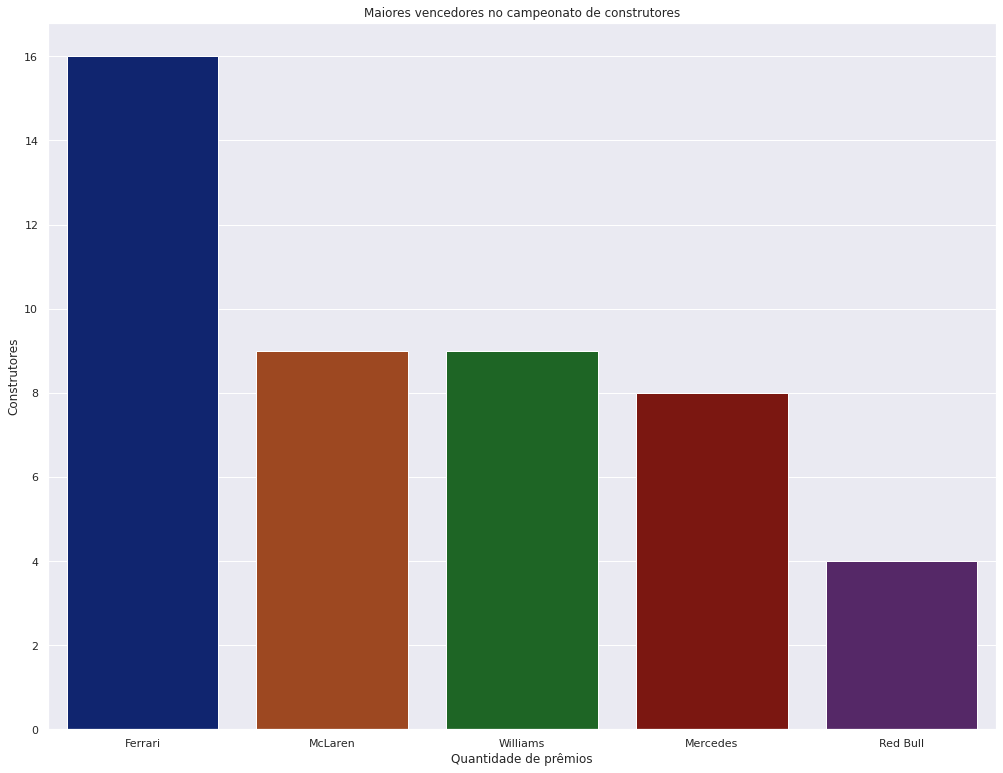

In [16]:
grouped_points = constructor_data_time.groupby(['ano','nome_construtor']).agg({'pontos':np.sum}).reset_index().sort_values(by=['ano','pontos'],ascending=[True,False])
winner_year = grouped_points.loc[grouped_points.groupby('ano')['pontos'].idxmax()]
winner_year = winner_year[winner_year.ano > 1958]
winner_times = winner_year.groupby('nome_construtor').agg({'ano':'count'}).rename(columns={'ano':'Quantidade_campeonatos'}).sort_values(by='Quantidade_campeonatos',ascending=False).reset_index().nlargest(5,'Quantidade_campeonatos')
g = sns.barplot(x='nome_construtor',y='Quantidade_campeonatos',data=winner_times,palette='dark')
g.set(xlabel='Quantidade de prêmios',ylabel='Construtores')
g.set_title('Maiores vencedores no campeonato de construtores')
sns.set(rc={'figure.figsize':(15,11)})
plt.show()

## Construtores com menor tempo de pit-stop 

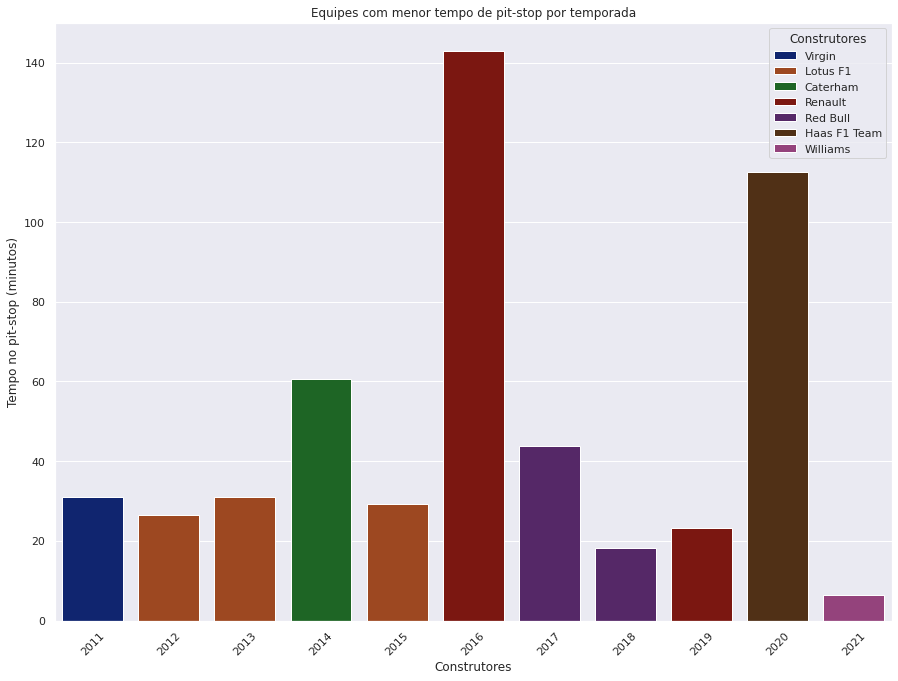

In [17]:
constructor_pits_info = constructor_data_time[constructor_data_time.soma_tempo_pits.notna()]
grouped_pits = constructor_pits_info.groupby(['ano','nome_construtor']).agg({'soma_tempo_pits':np.sum}).reset_index()
menor_tempo_pit = grouped_pits.loc[grouped_pits.groupby('ano')['soma_tempo_pits'].idxmin()]
# Transforma o tempo de milissegundos para minutos
menor_tempo_pit['soma_tempo_pits'] = menor_tempo_pit.soma_tempo_pits/60000
g = sns.barplot(x='ano',y='soma_tempo_pits',hue='nome_construtor',data=menor_tempo_pit,ci=None,dodge=False,palette='dark')
plt.xticks(rotation=45)
g.set(xlabel='Construtores',ylabel='Tempo no pit-stop (minutos)')
g.set_title('Equipes com menor tempo de pit-stop por temporada')
plt.legend(title='Construtores')
sns.set(rc={'figure.figsize':(15,11)})
plt.show()

## Pilotos com mais pole positions por ano

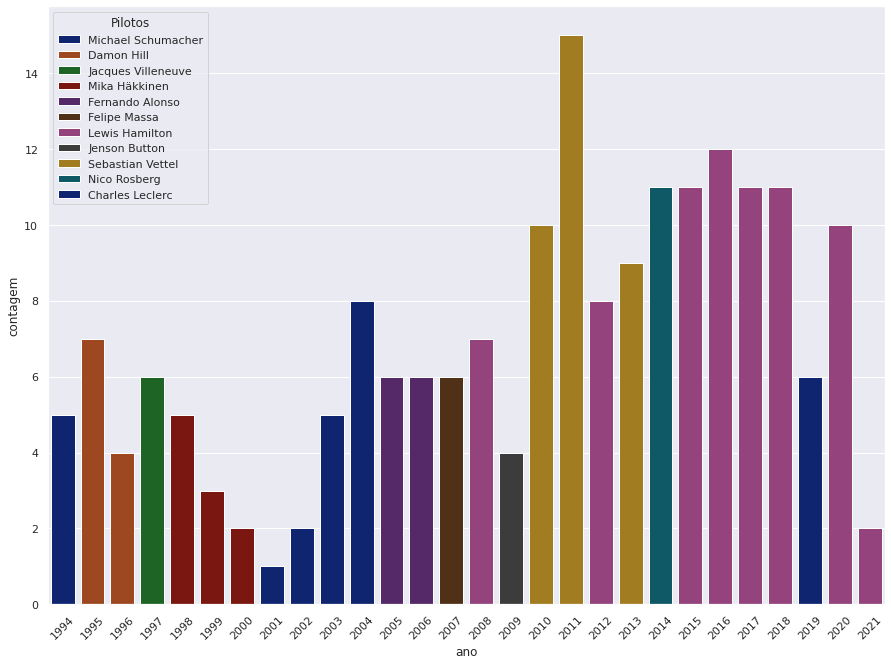

In [18]:
grouped_poles = driver_data_time.groupby(['ano','nome_piloto'])['posicao_qualify'].value_counts()
df = pd.DataFrame(grouped_poles)
df.rename(columns={'posicao_qualify':'contagem'},inplace=True)
df.reset_index(inplace=True)
df = df[df.posicao_qualify == 1]
first_places = df.loc[df.groupby('ano')['contagem'].idxmax()]

g = sns.barplot(x='ano',y='contagem',data=first_places,hue='nome_piloto',dodge=False,palette='dark')
plt.legend(title='Pilotos')
sns.set(rc={'figure.figsize':(15,11)})
plt.xticks(rotation=45)
plt.show()

## Pilotos com mais premiações




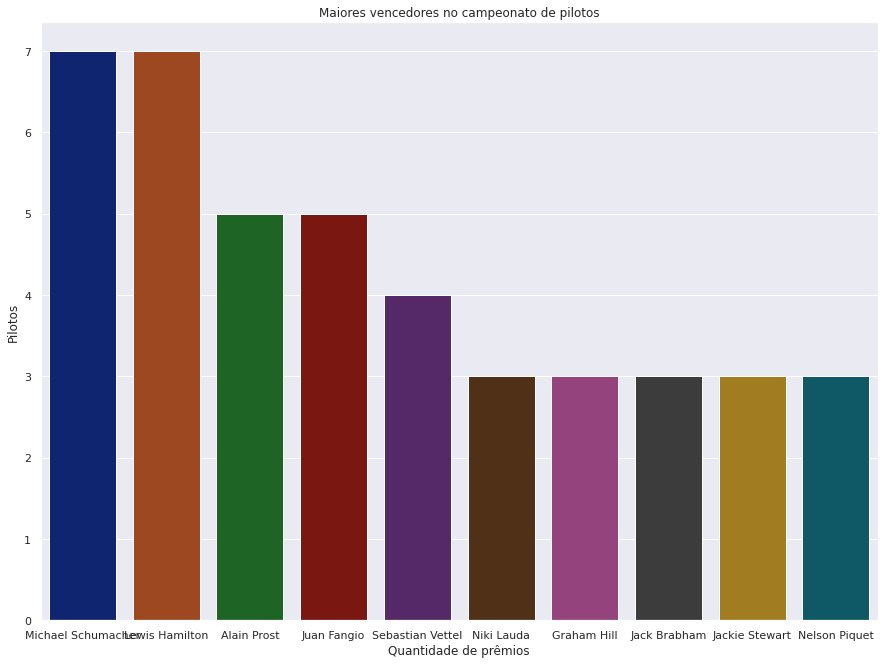

In [19]:
grouped_points = driver_data_time.groupby(['ano','nome_piloto']).agg({'pontos':np.sum}).reset_index().sort_values(by=['ano','pontos'],ascending=[True,False])
winner_year = grouped_points.loc[grouped_points.groupby('ano')['pontos'].idxmax()]
winner_year = winner_year[winner_year.ano != 2021]
winner_times = winner_year.groupby('nome_piloto').agg({'ano':'count'}).rename(columns={'ano':'Quantidade_campeonatos'}).sort_values(by='Quantidade_campeonatos',ascending=False).reset_index().nlargest(10,'Quantidade_campeonatos')
g = sns.barplot(x='nome_piloto',y='Quantidade_campeonatos',data=winner_times,palette='dark')
g.set(xlabel='Quantidade de prêmios',ylabel='Pilotos')
g.set_title('Maiores vencedores no campeonato de pilotos')
sns.set(rc={'figure.figsize':(15,11)})
plt.show()

## Melhores corridas de recuperação feita por pilotos

In [20]:
best_recoveries = driver_data_time.copy()
best_recoveries['pos_ganhadas'] = best_recoveries.posicao_qualify - best_recoveries.posicao_corrida
top_10 = best_recoveries.sort_values('pos_ganhadas',ascending=False).nlargest(10,'pos_ganhadas')
for index,row in top_10.iterrows():
  print(f'O piloto {row.nome_piloto} iniciou a corrida na posição {row.posicao_qualify} e terminou a corrida na posição {row.posicao_corrida} no ano de {row.ano}')


O piloto Kimi Räikkönen iniciou a corrida na posição 22.0 e terminou a corrida na posição 3 no ano de 2006
O piloto Lewis Hamilton iniciou a corrida na posição 21.0 e terminou a corrida na posição 3 no ano de 2014
O piloto Sebastian Vettel iniciou a corrida na posição 20.0 e terminou a corrida na posição 2 no ano de 2019
O piloto Heikki Kovalainen iniciou a corrida na posição 22.0 e terminou a corrida na posição 4 no ano de 2007
O piloto Fernando Alonso iniciou a corrida na posição 24.0 e terminou a corrida na posição 6 no ano de 2010
O piloto Lewis Hamilton iniciou a corrida na posição 21.0 e terminou a corrida na posição 3 no ano de 2016
O piloto Rubens Barrichello iniciou a corrida na posição 20.0 e terminou a corrida na posição 3 no ano de 2005
O piloto Jean-Marc Gounon iniciou a corrida na posição 26.0 e terminou a corrida na posição 9 no ano de 1994
O piloto Michael Schumacher iniciou a corrida na posição 22.0 e terminou a corrida na posição 5 no ano de 2006
O piloto Olivier Bere

# Dados sobre os circuitos

## Circuitos com mais voltas  realizadas

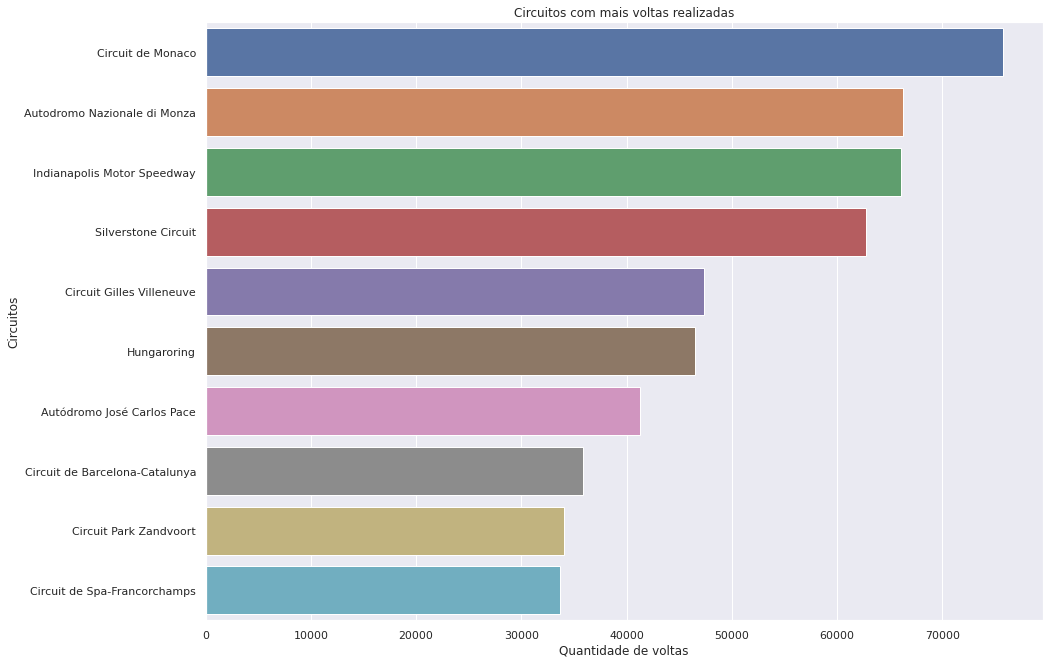

In [21]:
circuit_data = fact_table.merge(dim_circuito,on='id_circuito')
circuit_data_time = circuit_data.merge(dim_tempo,on='id_tempo')
agg_circuits = circuit_data.groupby('nome_circuito').agg({'numero_voltas':np.sum,'maior_velocidade':np.max,'tempo_corrida':np.max}).reset_index()
agg_voltas = agg_circuits.sort_values('numero_voltas',ascending=False).nlargest(10,'numero_voltas')
g = sns.barplot(y='nome_circuito',x='numero_voltas',data=agg_voltas)
g.set(xlabel='Quantidade de voltas',ylabel='Circuitos')
g.set_title('Circuitos com mais voltas realizadas')
sns.set(rc={'figure.figsize':(15,11)})

# Circuitos com voltas mais rápidas

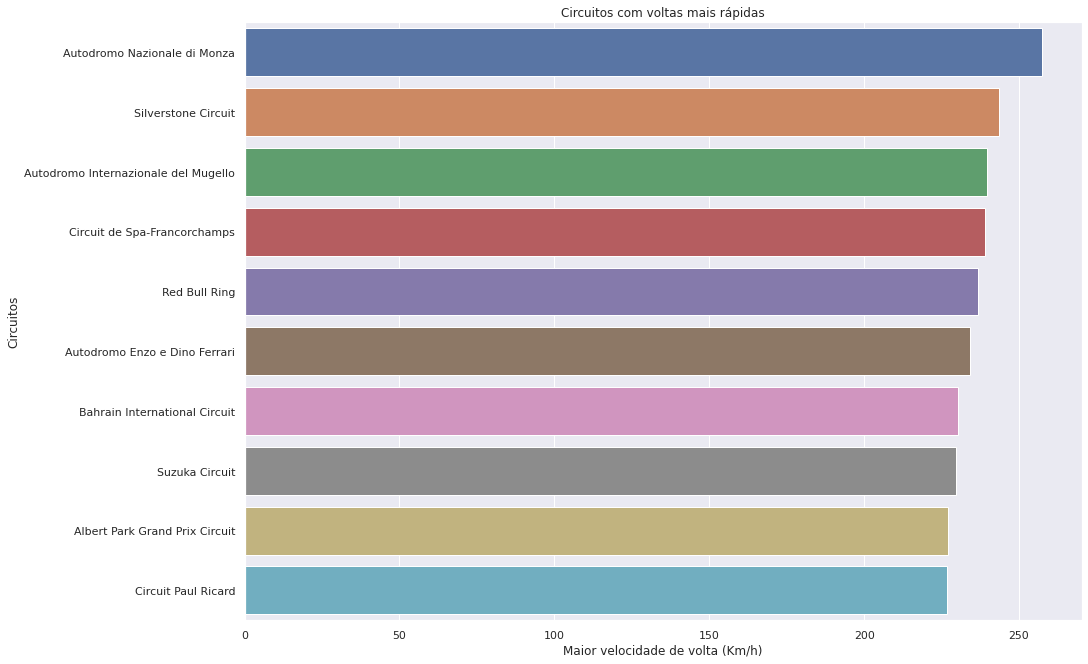

In [22]:
agg_velocidade = agg_circuits.sort_values('maior_velocidade',ascending=False).nlargest(10,'maior_velocidade')
g = sns.barplot(y='nome_circuito',x='maior_velocidade',data=agg_velocidade)
g.set(xlabel='Maior velocidade de volta (Km/h)',ylabel='Circuitos')
g.set_title('Circuitos com voltas mais rápidas')
sns.set(rc={'figure.figsize':(15,11)})

# Circuitos com maior tempo de duração



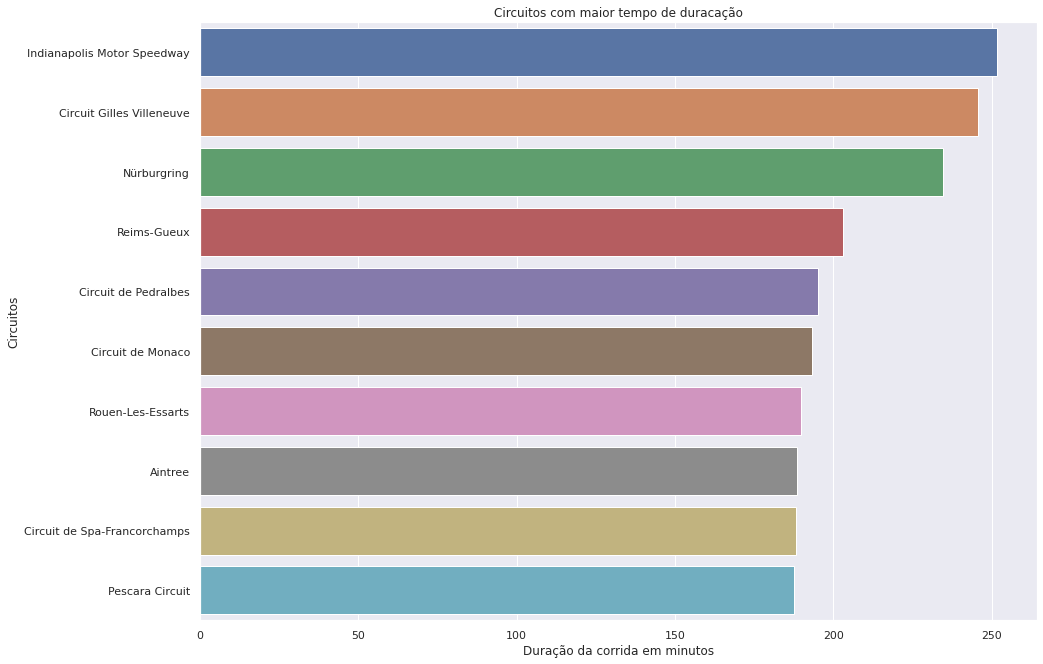

In [23]:
agg_circuits['tempo_corrida'] = agg_circuits.tempo_corrida/60000
agg_velocidade = agg_circuits.sort_values('tempo_corrida',ascending=False).nlargest(10,'tempo_corrida')
g = sns.barplot(y='nome_circuito',x='tempo_corrida',data=agg_velocidade)
g.set(xlabel='Duração da corrida em minutos',ylabel='Circuitos')
g.set_title('Circuitos com maior tempo de duracação')
sns.set(rc={'figure.figsize':(15,11)})